# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
resource_url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(resource_url) # Hago la solicitud GET para obtener el contenido HTML.

html_content = response.text # Almaceno el contenido en una variable.

In [ ]:
soup = BeautifulSoup(html_content, "html.parser") # Transformar la información en un objeto soup estructurado

soup_find_table = soup.find('div', class_ = 'profile-container pt-3').find('div', style = 'overflow-y: scroll;') # Busco dentro del objeto soup a travez de los div que encuentro tras utilizar las herramientas de desarrollador de nuestro navegador.

soup_table = soup_find_table.find('table') # Vuelvo a buscar de la misma manera pero ahora solo me quedo con la tabla. 

cells_of_table = soup_table.find_all('td') # vuelvo a buscar y me quedo con todas las celdas de la tabla.

# Obtengo el texto de cada celda.
cell_text = [cell.text.strip() for cell in cells_of_table]


# Organizo los datos en grupos de 3 (Año, Ganancia, Porcentaje de cambio).
data = []

for i in range(0, len(cell_text), 3):
    year = cell_text[i]
    revenue = cell_text[i + 1]
    change = cell_text[i + 2]
    data.append([year, revenue, change])

# Creo un DataFrame con los datos organizados.
df = pd.DataFrame(data, columns=['Year', 'Revenue', 'Change'])
df

,Year,Revenue,Change
0,2024,$97.15 B,0.39%
1,2023,$96.77 B,18.8%
2,2022,$81.46 B,51.35%
3,2021,$53.82 B,70.67%
4,2020,$31.53 B,28.31%
5,2019,$24.57 B,14.52%
6,2018,$21.46 B,82.51%
7,2017,$11.75 B,67.98%
8,2016,$7.00 B,73.01%
9,2015,$4.04 B,26.5%


In [145]:
# Limpio la columna revenue.
df['Revenue'] = df['Revenue'].replace({'$': '', ' B': '', ',': ''}, regex=True)

# Convierto la columna revenue a tipo float.
df['Revenue'] = df['Revenue'].astype(float)

# Limpio la columna change.
df['Change'] = df['Change'].replace({'%': '', ',': '', 'tenog': '0'}, regex=True)

# Convierto la columna change a tipo numérico.
df['Change'] = pd.to_numeric(df['Change'], errors='coerce')

# Elimino las filas con valores NaN.
df_final = df.dropna()
df_final


,Year,Revenue,Change
0,2024,97.15,0.39
1,2023,96.77,18.80
2,2022,81.46,51.35
3,2021,53.82,70.67
4,2020,31.53,28.31
5,2019,24.57,14.52
6,2018,21.46,82.51
7,2017,11.75,67.98
8,2016,7.00,73.01
9,2015,4.04,26.50


In [146]:
import sqlite3

#lo hago con with para asegurarme de que se cierre la concección y no se bloquee. 
with sqlite3.connect('DB_tesla') as con: # Creo, doy nombre y me conecto a la base de datos sqlite.
    df.to_sql('Tesla_table', con, if_exists='replace', index=False)  # Inserto o convierto el dataframe en sql.

In [147]:
# Muestro los resultados para verificar que he insertado bien los datos en la base de datos sql.
with sqlite3.connect('DB_tesla') as con:
    
    cursor = con.cursor() # Creo el cursor para ejecutar la consulta.
    
    
    cursor.execute('SELECT * FROM Tesla_table') # Ejecuto la consulta SELECT para obtener todos los datos de la tabla.
    
    
    data_rows = cursor.fetchall() # Obtener todos los resultados.
    
    
    for row in data_rows: # Mostrar los resultados.
        print(row)

('2024', 97.15, 0.39)
('2023', 96.77, 18.8)
('2022', 81.46, 51.35)
('2021', 53.82, 70.67)
('2020', 31.53, 28.31)
('2019', 24.57, 14.52)
('2018', 21.46, 82.51)
('2017', 11.75, 67.98)
('2016', 7.0, 73.01)
('2015', 4.04, 26.5)
('2014', 3.19, 58.85)
('2013', 2.01, 387.23)
('2012', 0.41, 102.34)
('2011', 0.2, 74.95)
('2010', 0.11, 4.29)


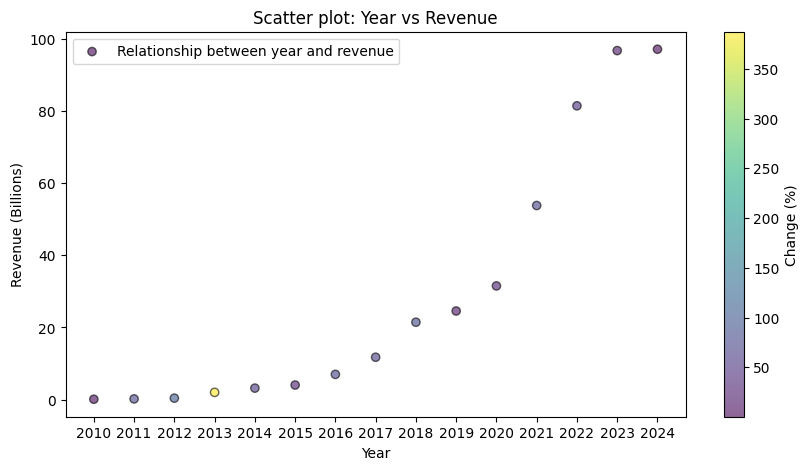

In [161]:
year = df_final['Year']
revenue = df_final['Revenue']
change = df_final['Change']

plt.figure(figsize = (10, 5))
scatter = plt.scatter(year, revenue, c = change, label = "Relationship between year and revenue", edgecolors='k', alpha=0.6)
plt.title("Scatter plot: Year vs Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue (Billions)")
plt.legend()
plt.gca().invert_xaxis()
plt.colorbar(scatter, label='Change (%)')
plt.show()
